In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import re

In [2]:
region_youth_1 = pd.read_excel('./region_youth_1.xlsx', usecols = "B:BV", header =1, index_col =0)

C:\Users\Doffal\anaconda3\envs\kword\lib\site-packages\pandas\io\excel\_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


In [3]:
region_youth_1

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,...,세종특별자치시.2,경기도.2,강원도.2,충청북도.2,충청남도.2,전라북도.2,전라남도.2,경상북도.2,경상남도.2,제주특별자치도.2
시점,,,,,,,,,,,,,,,,,,,,,
2001,4150,763,296,223,253,134,132,111,-,949,...,-,379,65,66,81,84,81,116,125,22
2002,4192,758,291,223,253,139,134,113,-,988,...,-,379,61,63,76,77,71,107,118,20
2003,4186,748,284,223,246,140,135,112,-,1003,...,-,385,58,60,74,73,67,103,115,20
2004,4118,730,275,219,237,140,133,110,-,1002,...,-,391,55,57,73,72,67,101,117,20
2005,4018,705,261,211,229,137,131,106,-,992,...,-,405,55,56,71,73,69,100,120,20
2006,3919,683,250,203,221,135,128,102,-,979,...,-,425,56,58,73,72,67,99,121,21
2007,3808,659,238,196,214,132,125,98,-,961,...,-,451,59,62,79,73,66,101,123,22
2008,3631,626,222,185,204,126,119,92,-,926,...,-,476,61,65,84,75,67,103,127,23
2009,3446,596,208,175,193,120,113,86,-,887,...,-,495,61,66,87,79,71,105,134,24


In [4]:
for col in region_youth_1:
    print(col)

전국
서울특별시
부산광역시
대구광역시
인천광역시
광주광역시
대전광역시
울산광역시
세종특별자치시
경기도
강원도
충청북도
충청남도
전라북도
전라남도
경상북도
경상남도
제주특별자치도
전국.1
서울특별시.1
부산광역시.1
대구광역시.1
인천광역시.1
광주광역시.1
대전광역시.1
울산광역시.1
세종특별자치시.1
경기도.1
강원도.1
충청북도.1
충청남도.1
전라북도.1
전라남도.1
경상북도.1
경상남도.1
제주특별자치도.1
전국.2
서울특별시.2
부산광역시.2
대구광역시.2
인천광역시.2
광주광역시.2
대전광역시.2
울산광역시.2
세종특별자치시.2
경기도.2
강원도.2
충청북도.2
충청남도.2
전라북도.2
전라남도.2
경상북도.2
경상남도.2
제주특별자치도.2


In [5]:
##각 지역별로 필요한 컬럼 추출 및 컬럼명 변경

#전국
region_all = region_youth_1[['전국', '전국.1', '전국.2']]
region_all.columns = ['ele', 'mid', 'hig']
region_all['all'] = region_all['ele'] + region_all['mid'] + region_all['hig']
region_all.reset_index(level= ['시점'], inplace= True)

#서울
region_seo = region_youth_1[['서울특별시', '서울특별시.1', '서울특별시.2']]
region_seo.columns = ['ele', 'mid', 'hig']
region_seo['all'] = region_seo['ele'] + region_seo['mid'] + region_seo['hig']
region_seo.reset_index(level= ['시점'], inplace= True)

#부산
region_bus = region_youth_1[['부산광역시', '부산광역시.1', '부산광역시.2']]
region_bus.columns = ['ele', 'mid', 'hig']
region_bus['all'] = region_bus['ele'] + region_bus['mid'] + region_bus['hig']
region_bus.reset_index(level= ['시점'], inplace= True)

#대구
region_daeg = region_youth_1[['대구광역시', '대구광역시.1', '대구광역시.2']]
region_daeg.columns = ['ele', 'mid', 'hig']
region_daeg['all'] = region_daeg['ele'] + region_daeg['mid'] + region_daeg['hig']
region_daeg.reset_index(level= ['시점'], inplace= True)

#인천
region_inc = region_youth_1[['인천광역시', '인천광역시.1', '인천광역시.2']]
region_inc.columns = ['ele', 'mid', 'hig']
region_inc['all'] = region_inc['ele'] + region_inc['mid'] + region_inc['hig']
region_inc.reset_index(level= ['시점'], inplace= True)

#광주
region_gwa = region_youth_1[['광주광역시', '광주광역시.1', '광주광역시.2']]
region_gwa.columns = ['ele', 'mid', 'hig']
region_gwa['all'] = region_gwa['ele'] + region_gwa['mid'] + region_gwa['hig']
region_gwa.reset_index(level= ['시점'], inplace= True)

#대전
region_daej = region_youth_1[['대전광역시', '대전광역시.1', '대전광역시.2']]
region_daej.columns = ['ele', 'mid', 'hig']
region_daej['all'] = region_daej['ele'] + region_daej['mid'] + region_daej['hig']
region_daej.reset_index(level= ['시점'], inplace= True)

#울산
region_uls = region_youth_1[['울산광역시', '울산광역시.1', '울산광역시.2']]
region_uls.columns = ['ele', 'mid', 'hig']
region_uls['all'] = region_uls['ele'] + region_uls['mid'] + region_uls['hig']
region_uls.reset_index(level= ['시점'], inplace= True)

#세종
region_sej = region_youth_1[['세종특별자치시', '세종특별자치시.1', '세종특별자치시.2']]
region_sej.columns = ['ele', 'mid', 'hig']
region_sej['all'] = region_sej['ele'] + region_sej['mid'] + region_sej['hig']
region_sej.reset_index(level= ['시점'], inplace= True)

#세종 일부데이터 삭제(2012년도부터 데이터 있음)
# region_sej = region_sej.iloc[11:]
# region_sej = region_sej.reset_index(drop= True)
# region_sej['all'] = region_sej['all'].astype('str')

#경기
region_gye = region_youth_1[['경기도', '경기도.1', '경기도.2']]
region_gye.columns = ['ele', 'mid', 'hig']
region_gye['all'] = region_gye['ele'] + region_gye['mid'] + region_gye['hig']
region_gye.reset_index(level= ['시점'], inplace= True)

#강원
region_kang = region_youth_1[['강원도', '강원도.1', '강원도.2']]
region_kang.columns = ['ele', 'mid', 'hig']
region_kang['all'] = region_kang['ele'] + region_kang['mid'] + region_kang['hig']
region_kang.reset_index(level= ['시점'], inplace= True)

#충북
region_chub = region_youth_1[['충청북도', '충청북도.1', '충청북도.2']]
region_chub.columns = ['ele', 'mid', 'hig']
region_chub['all'] = region_chub['ele'] + region_chub['mid'] + region_chub['hig']
region_chub.reset_index(level= ['시점'], inplace= True)

#충남
region_chun = region_youth_1[['충청남도', '충청남도.1', '충청남도.2']]
region_chun.columns = ['ele', 'mid', 'hig']
region_chun['all'] = region_chun['ele'] + region_chun['mid'] + region_chun['hig']
region_chun.reset_index(level= ['시점'], inplace= True)

#전북
region_jeob = region_youth_1[['전라북도', '전라북도.1', '전라북도.2']]
region_jeob.columns = ['ele', 'mid', 'hig']
region_jeob['all'] = region_jeob['ele'] + region_jeob['mid'] + region_jeob['hig']
region_jeob.reset_index(level= ['시점'], inplace= True)

#전남
region_jeon = region_youth_1[['전라남도', '전라남도.1', '전라남도.2']]
region_jeon.columns = ['ele', 'mid', 'hig']
region_jeon['all'] = region_jeon['ele'] + region_jeon['mid'] + region_jeon['hig']
region_jeon.reset_index(level= ['시점'], inplace= True)

#경북
region_gyeb = region_youth_1[['경상북도', '경상북도.1', '경상북도.2']]
region_gyeb.columns = ['ele', 'mid', 'hig']
region_gyeb['all'] = region_gyeb['ele'] + region_gyeb['mid'] + region_gyeb['hig']
region_gyeb.reset_index(level= ['시점'], inplace= True)

#경남
region_gyen = region_youth_1[['경상남도', '경상남도.1', '경상남도.2']]
region_gyen.columns = ['ele', 'mid', 'hig']
region_gyen['all'] = region_gyen['ele'] + region_gyen['mid'] + region_gyen['hig']
region_gyen.reset_index(level= ['시점'], inplace= True)

#제주
region_jej = region_youth_1[['제주특별자치도', '제주특별자치도.1', '제주특별자치도.2']]
region_jej.columns = ['ele', 'mid', 'hig']
region_jej['all'] = region_jej['ele'] + region_jej['mid'] + region_jej['hig']
region_jej.reset_index(level= ['시점'], inplace= True)

C:\Users\Doffal\AppData\Local\Temp/ipykernel_34760/406630048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_all['all'] = region_all['ele'] + region_all['mid'] + region_all['hig']
C:\Users\Doffal\AppData\Local\Temp/ipykernel_34760/406630048.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_seo['all'] = region_seo['ele'] + region_seo['mid'] + region_seo['hig']
C:\Users\Doffal\AppData\Local\Temp/ipykernel_34760/406630048.py:18: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [6]:
region_all

,시점,ele,mid,hig,all
0,2001,4150,1847,2014,8011
1,2002,4192,1863,1902,7957
2,2003,4186,1913,1846,7945
3,2004,4118,1993,1824,7935
4,2005,4018,2064,1841,7923
5,2006,3919,2104,1888,7911
6,2007,3808,2095,1966,7869
7,2008,3631,2070,2039,7740
8,2009,3446,2034,2089,7569
9,2010,3280,1985,2084,7349


In [7]:
#상관분석을 위한 파일 저장
region_all.to_excel('./region_all.xlsx')

In [ ]:
#전국 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_all['시점'], region_all['ele'], label ='elementary')
plt.plot(region_all['시점'], region_all['mid'], label ='middle')
plt.plot(region_all['시점'], region_all['hig'], label ='high')
plt.plot(region_all['시점'], region_all['all'], label ='all')

#그래프 제목
plt.title('All school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/All_school_youth.jpg')

In [ ]:
#서울 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_seo['시점'], region_seo['ele'], label ='elementary')
plt.plot(region_seo['시점'], region_seo['mid'], label ='middle')
plt.plot(region_seo['시점'], region_seo['hig'], label ='high')
plt.plot(region_seo['시점'], region_seo['all'], label ='all')

#그래프 제목
plt.title('Seoul school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Seoul_school_youth.jpg')

In [ ]:
#부산 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_bus['시점'], region_bus['ele'], label ='elementary')
plt.plot(region_bus['시점'], region_bus['mid'], label ='middle')
plt.plot(region_bus['시점'], region_bus['hig'], label ='high')
plt.plot(region_bus['시점'], region_bus['all'], label ='all')

#그래프 제목
plt.title('Busan school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Busan_school_youth.jpg')

In [ ]:
#대구 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_daeg['시점'], region_daeg['ele'], label ='elementary')
plt.plot(region_daeg['시점'], region_daeg['mid'], label ='middle')
plt.plot(region_daeg['시점'], region_daeg['hig'], label ='high')
plt.plot(region_daeg['시점'], region_daeg['all'], label ='all')

#그래프 제목
plt.title('Daegu school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Daegu_school_youth.jpg')

In [ ]:
#인천 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_inc['시점'], region_inc['ele'], label ='elementary')
plt.plot(region_inc['시점'], region_inc['mid'], label ='middle')
plt.plot(region_inc['시점'], region_inc['hig'], label ='high')
plt.plot(region_inc['시점'], region_inc['all'], label ='all')

#그래프 제목
plt.title('Incheon school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Incheon_school_youth.jpg')

In [ ]:
#광주 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_gwa['시점'], region_gwa['ele'], label ='elementary')
plt.plot(region_gwa['시점'], region_gwa['mid'], label ='middle')
plt.plot(region_gwa['시점'], region_gwa['hig'], label ='high')
plt.plot(region_gwa['시점'], region_gwa['all'], label ='all')

#그래프 제목
plt.title('Gwangju school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Gwangju_school_youth.jpg')

In [ ]:
#대전 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_daej['시점'], region_daej['ele'], label ='elementary')
plt.plot(region_daej['시점'], region_daej['mid'], label ='middle')
plt.plot(region_daej['시점'], region_daej['hig'], label ='high')
plt.plot(region_daej['시점'], region_daej['all'], label ='all')

#그래프 제목
plt.title('Daejeon school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Daejeon_school_youth.jpg')

In [ ]:
#울산 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_uls['시점'], region_uls['ele'], label ='elementary')
plt.plot(region_uls['시점'], region_uls['mid'], label ='middle')
plt.plot(region_uls['시점'], region_uls['hig'], label ='high')
plt.plot(region_uls['시점'], region_uls['all'], label ='all')

#그래프 제목
plt.title('Ulsan school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Ulsan_school_youth.jpg')

In [6]:
region_sej = region_sej.iloc[11:]
region_sej = region_sej.reset_index(drop= True)
region_sej['all'] = region_sej['all'].astype('str')
region_sej['시점'] = region_sej['시점'].astype('str')

In [7]:
region_sej

,시점,ele,mid,hig,all
0,2012,6,3,3,12
1,2013,7,4,4,15
2,2014,8,4,4,16
3,2015,14,6,6,26
4,2016,19,8,8,35
5,2017,22,9,9,40
6,2018,26,11,10,47
7,2019,28,12,10,50
8,2020,30,13,11,54
9,2021,32,15,12,59


In [8]:
time = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
        '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
        '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030']
time_dic = {'시점' : time}
#DataFrame형식 변환
time_df = pd.DataFrame(time_dic)

In [9]:
region_sej_1 = pd.merge(time_df, region_sej, how='left')

In [10]:
region_sej_1 = region_sej_1.fillna(0)

In [16]:
region_sej_1['시점'] = region_sej_1['시점'].astype('int')
region_sej_1['all'] = region_sej_1['all'].astype('int')

In [ ]:
region_sej.info()

In [17]:
region_sej_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   시점      30 non-null     int32
 1   ele     30 non-null     int64
 2   mid     30 non-null     int64
 3   hig     30 non-null     int64
 4   all     30 non-null     int32
dtypes: int32(2), int64(3)
memory usage: 1.2 KB


In [18]:
region_sej_1

,시점,ele,mid,hig,all
0,2001,0,0,0,0
1,2002,0,0,0,0
2,2003,0,0,0,0
3,2004,0,0,0,0
4,2005,0,0,0,0
5,2006,0,0,0,0
6,2007,0,0,0,0
7,2008,0,0,0,0
8,2009,0,0,0,0
9,2010,0,0,0,0


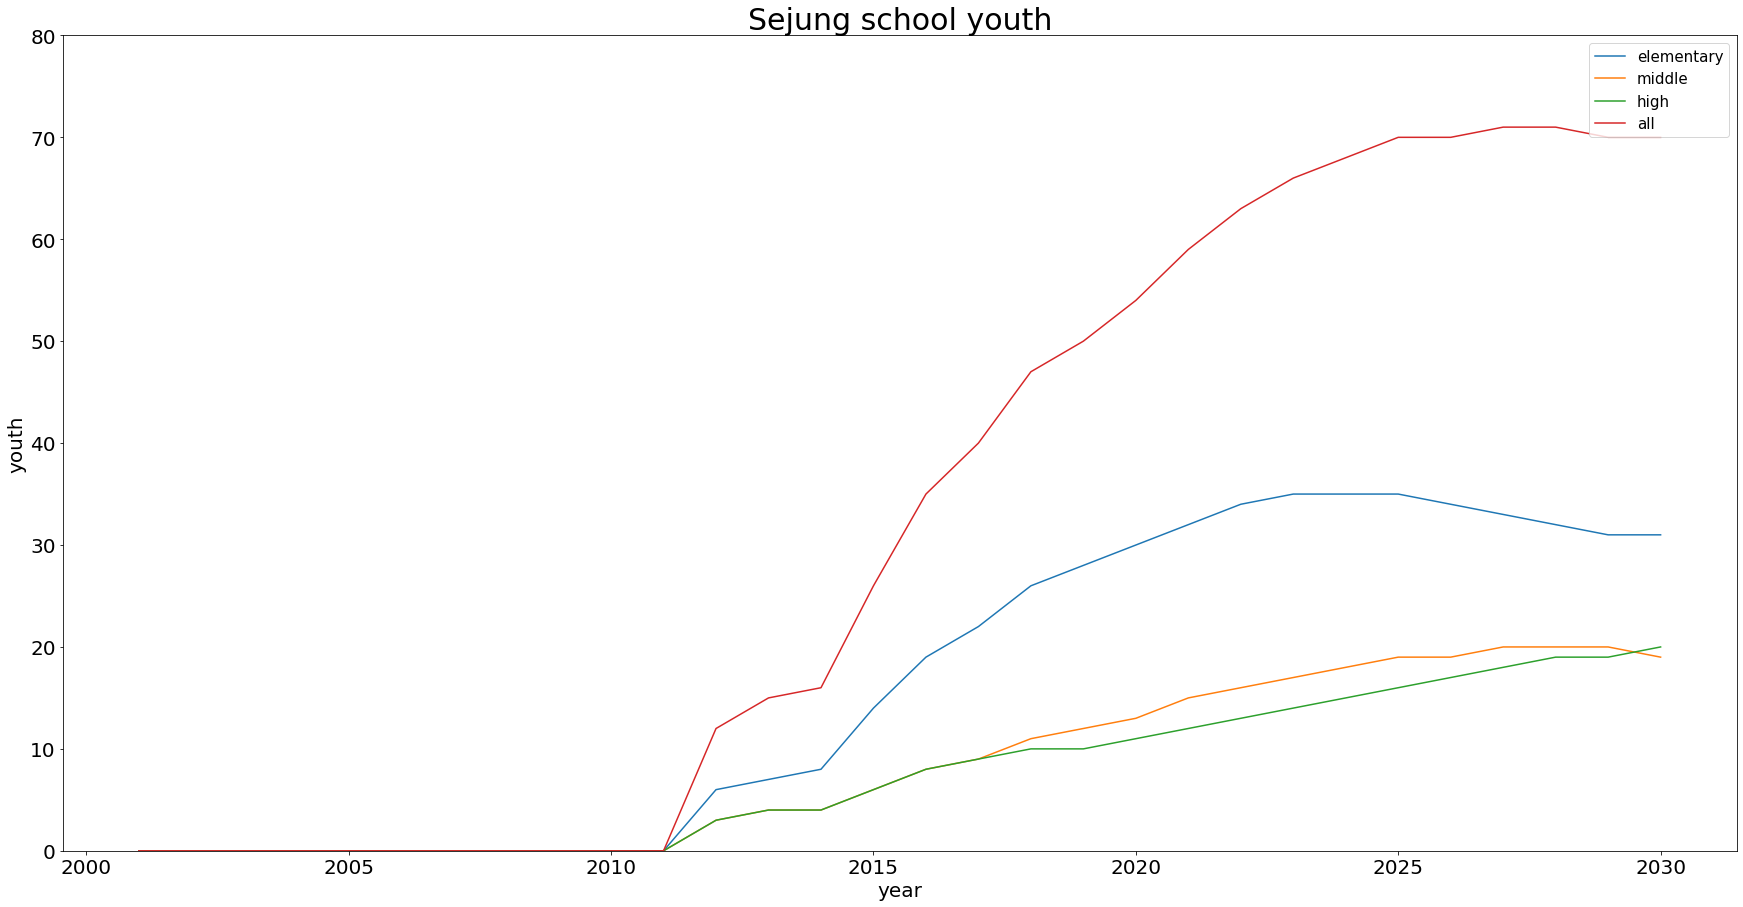

In [20]:
#세종 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))


#y축
plt.ylim(0, 30)

#그래프 x축 y축 내용 추가
plt.plot(region_sej_1['시점'], region_sej_1['ele'], label ='elementary')
plt.plot(region_sej_1['시점'], region_sej_1['mid'], label ='middle')
plt.plot(region_sej_1['시점'], region_sej_1['hig'], label ='high')
plt.plot(region_sej_1['시점'], region_sej_1['all'], label ='all')

#그래프 제목
plt.title('Sejung school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

plt.ylim([2000, 2030])

plt.ylim([0, 80])

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Sejung_school_youth.jpg')

In [ ]:
#경기도 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_gye['시점'], region_gye['ele'], label ='elementary')
plt.plot(region_gye['시점'], region_gye['mid'], label ='middle')
plt.plot(region_gye['시점'], region_gye['hig'], label ='high')
plt.plot(region_gye['시점'], region_gye['all'], label ='all')

#그래프 제목
plt.title('Gyeonggi school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Gyeonggi_school_youth.jpg')

In [ ]:
#강원도 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_kang['시점'], region_kang['ele'], label ='elementary')
plt.plot(region_kang['시점'], region_kang['mid'], label ='middle')
plt.plot(region_kang['시점'], region_kang['hig'], label ='high')
plt.plot(region_kang['시점'], region_kang['all'], label ='all')

#그래프 제목
plt.title('Kangwon school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Kangwon_school_youth.jpg')

In [ ]:
#충청북도 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_chub['시점'], region_chub['ele'], label ='elementary')
plt.plot(region_chub['시점'], region_chub['mid'], label ='middle')
plt.plot(region_chub['시점'], region_chub['hig'], label ='high')
plt.plot(region_chub['시점'], region_chub['all'], label ='all')

#그래프 제목
plt.title('Chungbuk school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Chungbuk_school_youth.jpg')

In [ ]:
#충청남도 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_chun['시점'], region_chun['ele'], label ='elementary')
plt.plot(region_chun['시점'], region_chun['mid'], label ='middle')
plt.plot(region_chun['시점'], region_chun['hig'], label ='high')
plt.plot(region_chun['시점'], region_chun['all'], label ='all')

#그래프 제목
plt.title('Chungnam school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Chungnam_school_youth.jpg')

In [ ]:
#전라북도 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_jeob['시점'], region_jeob['ele'], label ='elementary')
plt.plot(region_jeob['시점'], region_jeob['mid'], label ='middle')
plt.plot(region_jeob['시점'], region_jeob['hig'], label ='high')
plt.plot(region_jeob['시점'], region_jeob['all'], label ='all')

#그래프 제목
plt.title('Jeonbuk school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Jeonbuk_school_youth.jpg')

In [ ]:
#전라남도 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_jeon['시점'], region_jeon['ele'], label ='elementary')
plt.plot(region_jeon['시점'], region_jeon['mid'], label ='middle')
plt.plot(region_jeon['시점'], region_jeon['hig'], label ='high')
plt.plot(region_jeon['시점'], region_jeon['all'], label ='all')

#그래프 제목
plt.title('Jeonnam school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Jeonnam_school_youth.jpg')

In [ ]:
#경상북도 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_gyeb['시점'], region_gyeb['ele'], label ='elementary')
plt.plot(region_gyeb['시점'], region_gyeb['mid'], label ='middle')
plt.plot(region_gyeb['시점'], region_gyeb['hig'], label ='high')
plt.plot(region_gyeb['시점'], region_gyeb['all'], label ='all')

#그래프 제목
plt.title('Gyeongbuk school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Gyeongbuk_school_youth.jpg')

In [ ]:
#경상남도 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_gyen['시점'], region_gyen['ele'], label ='elementary')
plt.plot(region_gyen['시점'], region_gyen['mid'], label ='middle')
plt.plot(region_gyen['시점'], region_gyen['hig'], label ='high')
plt.plot(region_gyen['시점'], region_gyen['all'], label ='all')

#그래프 제목
plt.title('Gyeongnam school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Gyeongnam_school_youth.jpg')

In [ ]:
#제주 학령인구 시계열 그래프 

#그래프 크기
plt.figure(figsize=(30, 15))

#그래프 x축 y축 내용 추가
plt.plot(region_jej['시점'], region_jej['ele'], label ='elementary')
plt.plot(region_jej['시점'], region_jej['mid'], label ='middle')
plt.plot(region_jej['시점'], region_jej['hig'], label ='high')
plt.plot(region_jej['시점'], region_jej['all'], label ='all')

#그래프 제목
plt.title('Jeju school youth', fontsize = 30)

#x축 제목 크기
plt.xticks(fontsize =20)

#y축 제목 크기
plt.yticks(fontsize =20)

#x축
plt.xlabel('year', fontsize =20)

#y축
plt.ylabel('youth', fontsize =20)

#범례
plt.legend(loc = 'upper right', fontsize = 15)

#그래프 저장
plt.savefig('./graph/Jeju_school_youth.jpg')